# Natural Language Processing for Data Analysis on User Intents concerning COVID-19 Vaccines #

### Introduction

The COVID-19 pandemic has had a significant impact worldwide. As governments implemented measures such as lockdowns and business closures, the economic impact was felt by societies immediately.
This urgent matter has led to researchers to investigate this phenomenon. Accordingly, this report is to provide the relevant dimensions and present important aspects of common user intents related to COVID-19 vaccines.
For this investigation, data was provided  from the Vaccine Information Resource Assistant (VIRA) Conversation Corpus openly released by IBM research.
They are in the context of VIRA, a chat bot that aims to address COVID-19 vaccine hesitancy (vaxchat.org) to examine diverse queries mapped to people’s intents concerning COVID- 19 vaccines.

This investigation is an EDA or story telling through its data along with content based recommendation system and a wide range of different graphs and visuals.

* **Research Question:**
What are the most common user intents related to COVID-19 vaccines that are detected using the Intent dataset?
* **Problem Statement:** Despite the availability of the Intent dataset, there is a need for more advanced text analysis techniques to extract meaningful insights from the dataset regarding user intents related to COVID-19 vaccines.
* **Methods:** By using advanced text analysis techniques such as topic modeling, sentiment analysis, and exploring python packages such as BERTopic, it is possible to extract valuable insights from the Intent dataset regarding common user intents related to COVID-19 vaccines.

In [14]:
#!pip install pandas
#!pip install seaborn
##!pip install matplotlib
#!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


In [359]:
#Install the required libraries using the pip command (if you don't have them), and import the modules from the libraries.
%matplotlib inline


In [360]:
import pandas as pd
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [361]:
import os
import glob

# Set the directory path to search for Excel files
dir_path = '/Users/anna/Desktop/ANLP/Assignments/AT1B\ Datasets/IBM_Debater_\(R\)_Intent_expressions'

# Get a list of .csv files in the directory
files = glob.glob(os.path.join(dir_path, '*.csv'))

In [362]:
# Load the dataset
df = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/AT1B Datasets/IBM_Debater_(R)_Intent_expressions/dev_23.csv')


## Preliminary Data Inspection
Print general information about DataFrame 

In [363]:
#Print general information about a DataFrame including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   664 non-null    object
 1   label      664 non-null    object
 2   label_idx  664 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 15.7+ KB


In [364]:
df.count()

sentence     664
label        664
label_idx    664
dtype: int64

In [365]:
#Generate descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset’s distribution
df.describe()

,label_idx
count,664.000000
mean,79.640060
std,53.910447
min,0.000000
25%,30.000000
50%,75.500000
75%,124.000000
max,180.000000


In [366]:
# View first 10 rows of dataframe
df.head(10)

,sentence,label,label_idx
0,"If I apply the third dose, will I have stronge...",Are booster shot side effects worse than those...,175
1,What effects do these reinforcements have?,Are booster shot side effects worse than those...,175
2,i dont think the vaccine is neccessary the bas...,Are regular safety measures enough to stay hea...,20
3,"If I comply with the security measures, will I...",Are regular safety measures enough to stay hea...,20
4,"This is like the flu, being cautious is enough.",Are regular safety measures enough to stay hea...,20
5,"Wearing a mask, washing your hands and taking ...",Are regular safety measures enough to stay hea...,20
6,If you practice safe measures you will stay he...,Are regular safety measures enough to stay hea...,20
7,Would the vaccine hurt a lot to a child?,Are some vaccines safer for younger children t...,127
8,its effectiveness in younger children is not p...,Are some vaccines safer for younger children t...,127
9,Is there a difference in side effects between ...,Are the side effects worse for the second shot,34


In [367]:
#View random sample of 5 rows rather than the first few. 
df.sample(5)

,sentence,label,label_idx
68,Will I get sick if my spouse has covid but I h...,Can I still get COVID even after being vaccina...,41
151,I was told that you need a social security num...,Do you need a social security number to get a ...,105
353,I heard that the vaccine only covers one stran...,I'm not sure it is effective enough,16
265,"I had Covid ,when should I take Vaccine ?",How soon after I've had COVID-19 can I get the...,142
55,the last time i had a vaccination i had an all...,Can I get the vaccine if I have had allergic r...,38


In [368]:
#Count number of unique values in each column
#There are 181 Questions asked by ChatBot and 664 queries
for i in df.columns:
    print('-----------------------------------------------------------------------------------------')
    print("column name: ",str(i))
    print('Number of unique in this column: {0}'.format(df[i].nunique()))
    print("categories: ")
    print("{0}".format(df[i].value_counts(ascending=False)))

-----------------------------------------------------------------------------------------
column name:  sentence
Number of unique in this column: 664
categories: 
If I apply the third dose, will I have stronger side effects than the second dose?                              1
people who contracted covid should get vaccinated?                                                              1
Vaccines in certain people tend to produce some side effects, are these effects controllable if they happen?    1
tell me about the side effects                                                                                  1
Reactions can be worse than Covid                                                                               1
                                                                                                               ..
will this vaccine help with new omricon variant of the virus?                                                   1
Will the vaccine stop me getting ill if

## Analysis of Sentence and Label

Find questions with highest user engagement

Text(0.5, 1.05, 'Label Count')

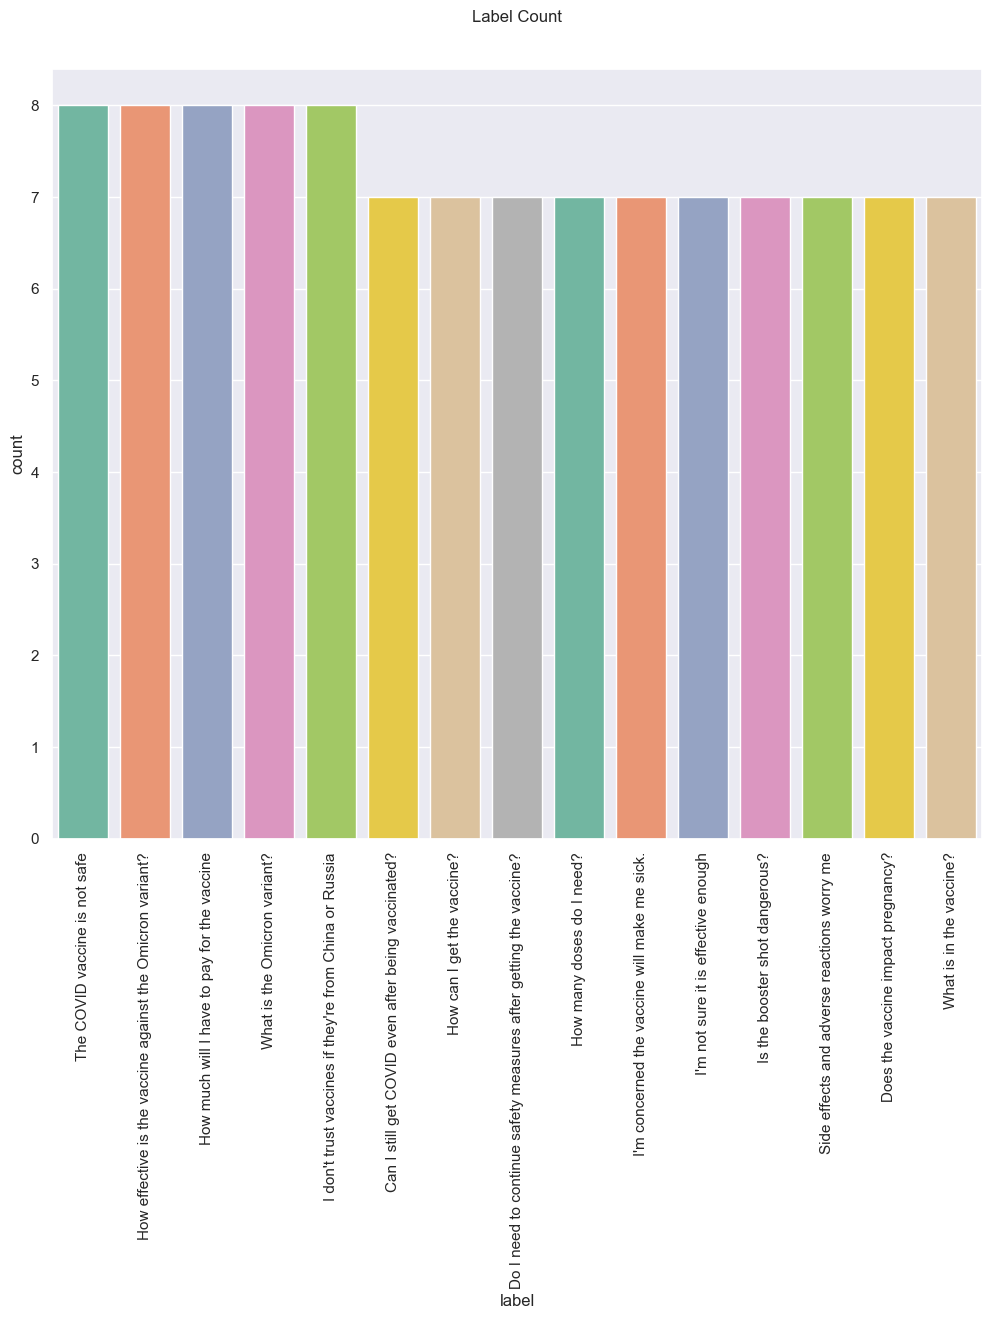

In [370]:
#Labels with the largest count of sentence by label

import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="label", data=df, palette="Set2", order=df['label'].value_counts(ascending=False).index[0:15])
ax.set_xticklabels([tick.get_text() for tick in ax.get_xticklabels()], rotation=90)
ax.set_title("Label Count", y=1.05)


##### **Key Insights:**

The labels with the highest count of responses per label can show what the majority of users are asking to the chatbot. 
* 'The COVID vaccine is not safe', 
* 'How effective is the vaccine against the Omicron variant?'
* 'How much will I have to pay for the vaccine'
* 'What is the Omicron variant'
* 'I don't trust vaccines if they're from China or Russia'
* 'Can I still get COVID even after being vaccinated'

In the top 5, the labels were mostly questions showing users wanting more information. One being related to politics showing distrust surrounding vaccines.

In [371]:
#Investigate responses to questions with highest user engagement

category_counts=df['label'].value_counts(ascending=False)

# Sort the index (which contains the label names) based on the count values
category_counts = category_counts.sort_values(ascending=False)

category_counts.head(50)

The COVID vaccine is not safe                                                 8
How much will I have to pay for the vaccine                                   8
What is the Omicron variant?                                                  8
I don't trust vaccines if they're from China or Russia                        8
How effective is the vaccine against the Omicron variant?                     8
Is the booster shot dangerous?                                                7
There are many reports of severe side effects or deaths from the vaccine      7
What is in the vaccine?                                                       7
Does the vaccine impact pregnancy?                                            7
Side effects and adverse reactions worry me                                   7
I'm not sure it is effective enough                                           7
I'm concerned the vaccine will make me sick.                                  7
How many doses do I need?               

Here we can investigate the responses to the label:

In [372]:
# Get the indices of the rows that belong to the top category
top_category = category_counts.index[0]
top_indices = df['label'] == top_category

# Select the 'label_idx', 'sentence', and 'label' columns for the top category
top_responses = df.loc[top_indices, ['sentence', 'label']]

top_responses

,sentence,label
447,The vaccine is dangerous?,The COVID vaccine is not safe
448,It isnt possible to know what the long term sa...,The COVID vaccine is not safe
449,Are they all safe,The COVID vaccine is not safe
450,are vaccines safe?,The COVID vaccine is not safe
451,is safe?,The COVID vaccine is not safe
452,is the vaccine safe ?,The COVID vaccine is not safe
453,is the vaccine reliable?,The COVID vaccine is not safe
454,its vaccine safe ?,The COVID vaccine is not safe


## Word Count

Word counts are simple but useful indicators for asking questions on the length of texts.

To demonstrate usage, we see how the metrics are calculated for one sample sentence from the dataset. 

In [373]:
s = df['sentence'][2]
print(s)

#Splitting by whitespace characters and calculating the length. Note that punctuation marks are also counted as words
len(s.split())

i dont think the vaccine is neccessary the basics safety measure is good enough


14

In [374]:
#To make it easier to reuse in the future, we can create a function that returns word count
def word_count(text):
    wc = len(text.split())
    return wc

Now now we can apply the word_count function to our text variable to create a new variable with the number of words in the news article text.

In [375]:
df['sentence_word_count'] = df['sentence'].apply(word_count)

We can use describe, hist, and scatter functions to provide some information on the length of articles in our dataset

In [376]:
df['sentence_word_count'].describe()

count    664.000000
mean      11.448795
std        5.840290
min        2.000000
25%        8.000000
50%       10.000000
75%       14.000000
max       50.000000
Name: sentence_word_count, dtype: float64

Text(0.5, 1.0, 'Histogram of Sentence Word Count')

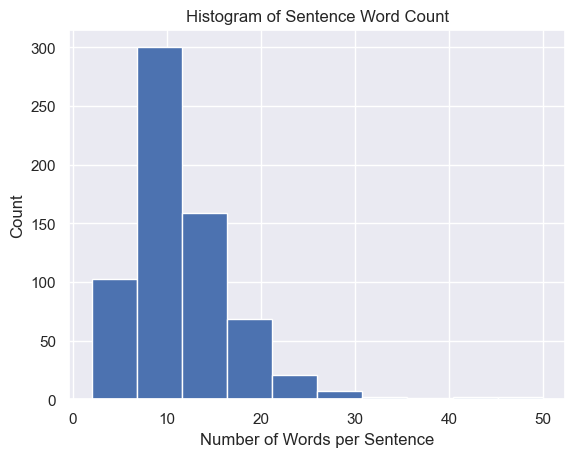

In [380]:
df['sentence_word_count'].hist(bins = 10)
plt.xlabel('Number of Words per Sentence')
plt.ylabel('Count')
plt.title('Histogram of Sentence Word Count')

Text(0.5, 1.0, 'Boxplot Sentence Word Count')

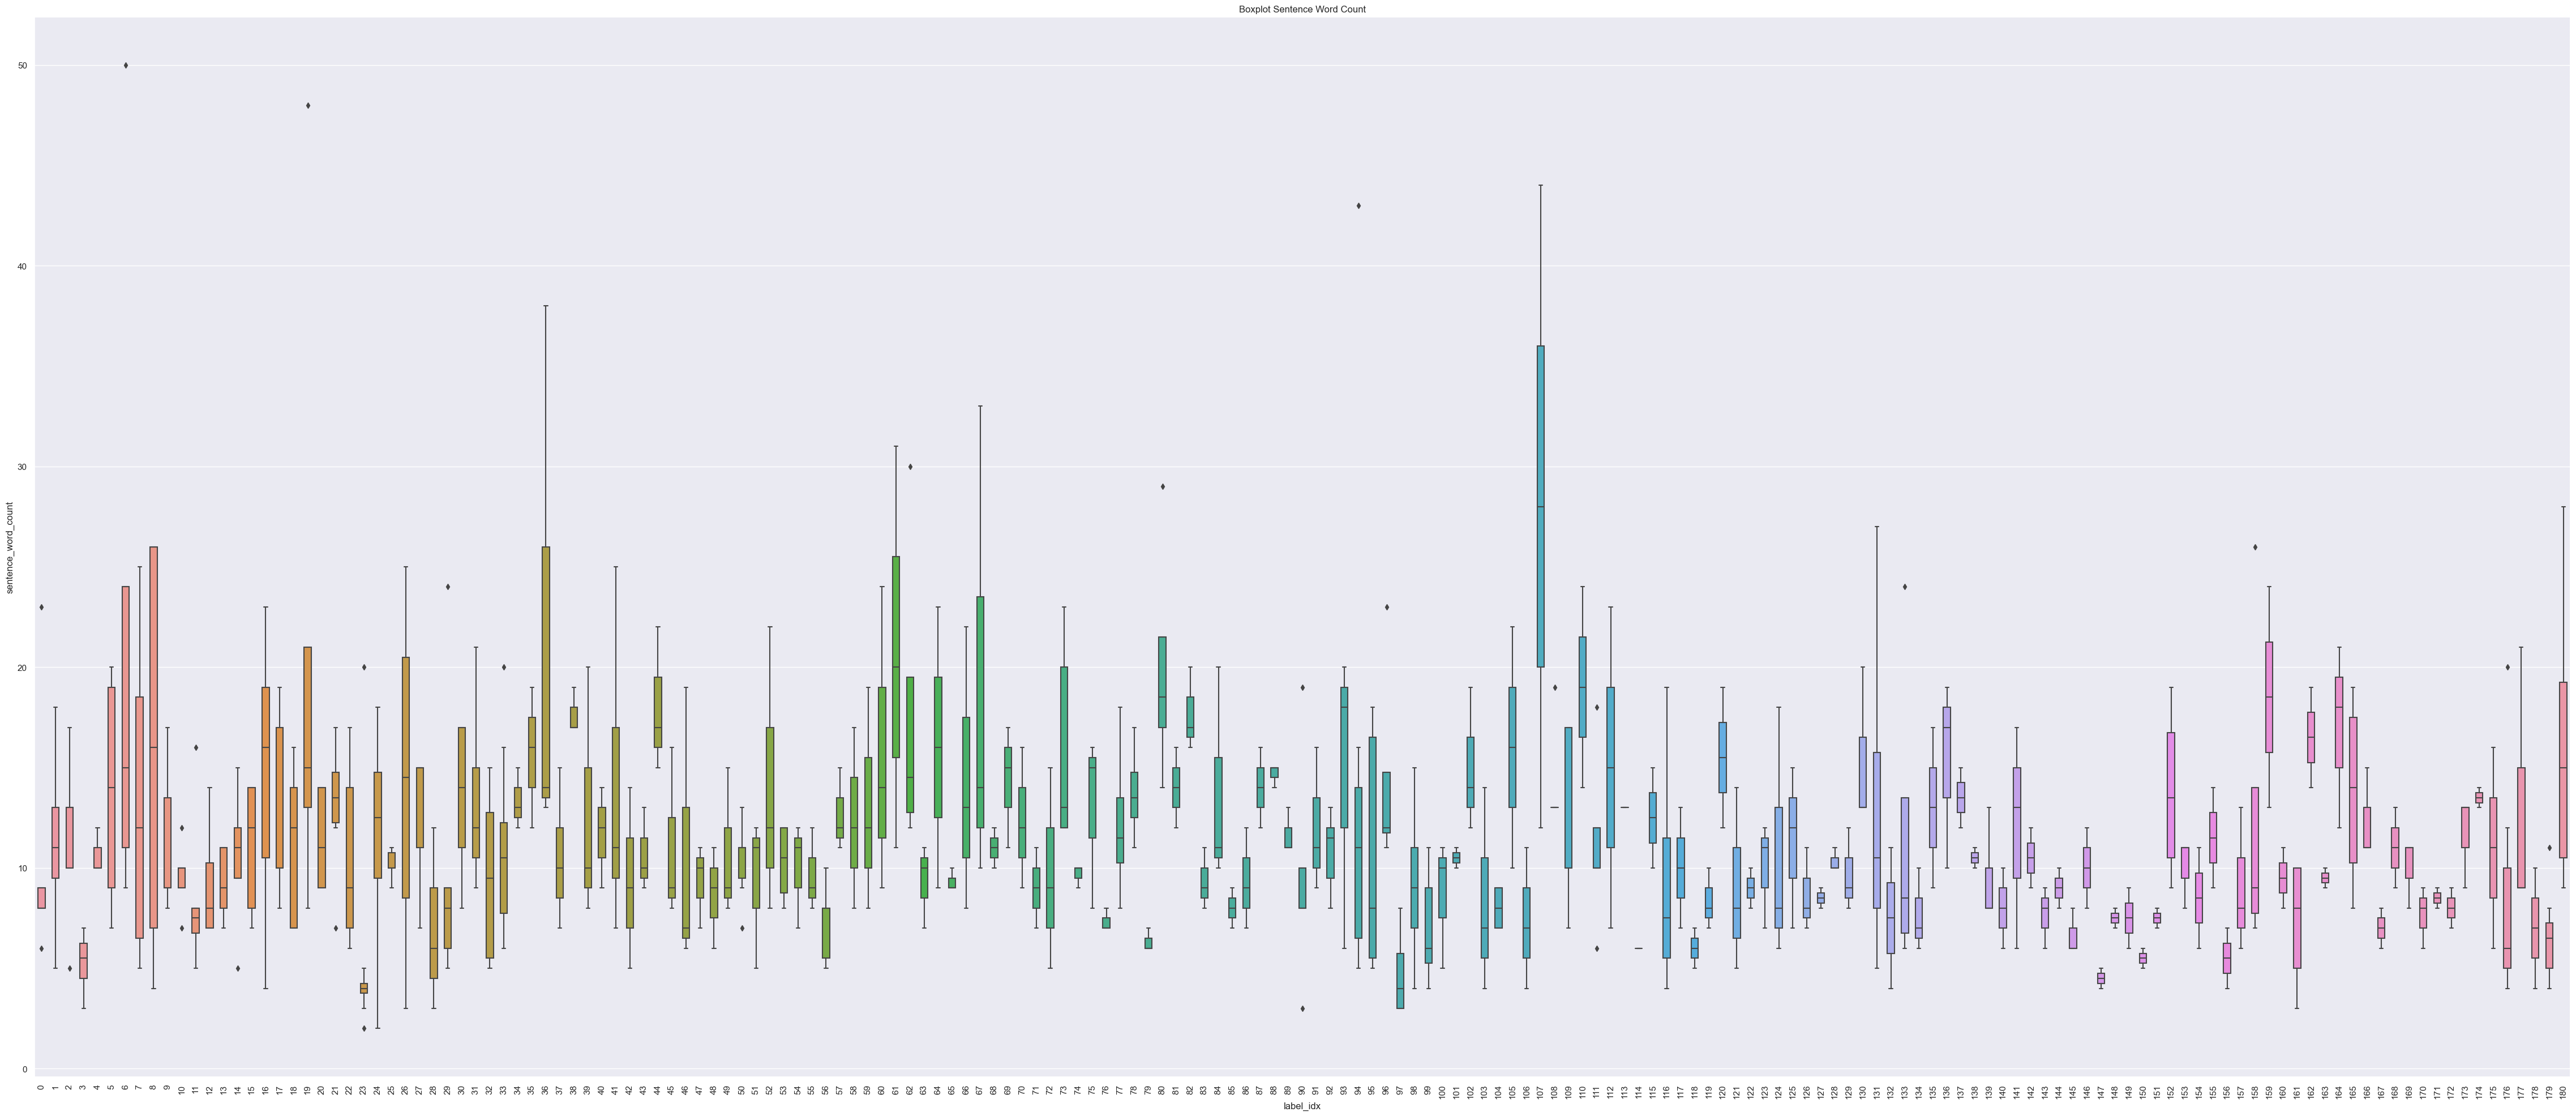

In [384]:
sns.boxplot(x = "label_idx", 
            y = "sentence_word_count",
            width=0.5,
            data =df);
plt.xticks(rotation=90)
plt.subplots_adjust(left=3, right=10, top=4, bottom=0.1)
plt.title('Boxplot Sentence Word Count')


##### **Key Insights:**
Boxplot of sentence length of each interval, the box plot represents the distribution of sentence length against their frequencies of each label. 
There seems to be a wide spread of sentence word count depending on the label

In [19]:
#Populates bar graph from a dataframe variable
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

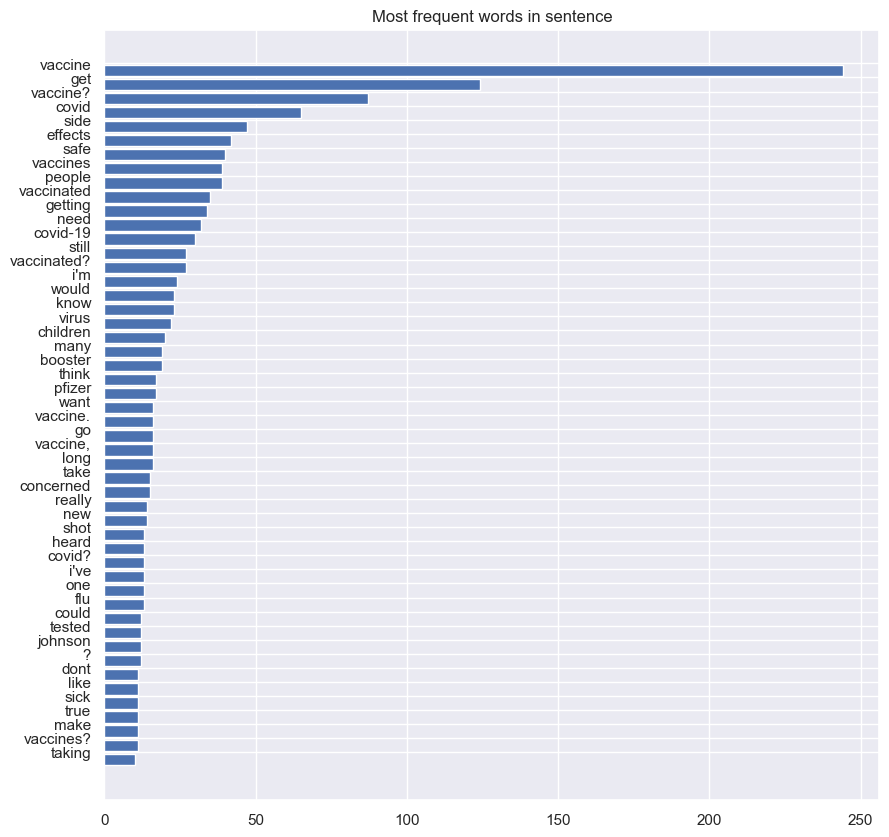

In [20]:
#Frequent words
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'sentence',"Most frequent words in sentence")

We can further explore the expressions which are of the longest and shortest lengths

In [21]:
#shortest
df.sort_values(by='sentence_word_count').head(10)

,sentence,label,label_idx,sentence_word_count
464,its obligatory,The vaccine should not be mandatory,24,2
451,is safe?,The COVID vaccine is not safe,23,2
663,WHAT IS COVID?,what is covid?,97,3
253,number of vaccinated,How many people already got the vaccine?,3,3
662,covid-19 is fake?,what is covid?,97,3
537,what is vaccine,What is in the vaccine?,28,3
532,What is Ivermectin?,What is Ivermectin?,161,3
659,what is covid-19,what is covid?,97,3
450,are vaccines safe?,The COVID vaccine is not safe,23,3
74,children need vaccination?,Can children get the vaccine?,90,3


In [22]:
#longest
df.sort_values(by='sentence_word_count', ascending=False).head(10)

,sentence,label,label_idx,sentence_word_count
276,I understand that given the high rates of deat...,I am concerned I will be a guinea pig,6,50
419,"I already mentioned it before, we do not know ...",Long term side-effects were not researched enough,19,48
372,Wear a mask that covers your nose and mouth. M...,Is it okay for me to travel internationally if...,107,44
470,These deaths will continue or the vaccine if i...,There are many reports of severe side effects ...,94,43
42,Testing should be carried out to discover if w...,Can I get other vaccines at the same time?,36,38
426,I am concerned that due to the haste with whic...,Should I get the COVID-19 vaccine if I am immu...,67,33
365,The vaccine is not approved for children and i...,Is breastfeeding safe with the vaccine,61,31
388,I've heard that the Johnson & Johnson vaccine ...,Is the Johnson & Johnson vaccine less effectiv...,62,30
610,What are the chances that after receiving the ...,Why do I need the COVID vaccine if I don't get...,80,29
219,If this vaccine does not help against the new ...,How effective is the vaccine against the Omicr...,180,28


The shortest sentence word count are general questions asking for more information on COVID and the vaccine. The longest sentence word counts show that probably the user has done more research and asking more specific questions surrounding COVID and the vaccine


## Word frequencies

Word frequencies (counting how often words occur) is a critical step in quantifying texts for many kinds of text analysis. This is useful in understanding user intent so we can identify:
* User vocabulary
* Key Themes
* Sentiment


Note that this analysis disregards the word order in the original sentence, taking a bag-of-words approach.

In [390]:
#Calculate frequencies to determine most common word in the column 'sentence'

# Convert series to string
article_text = df['sentence'].to_string()

#create word tokens
tokenized_words=word_tokenize(article_text)


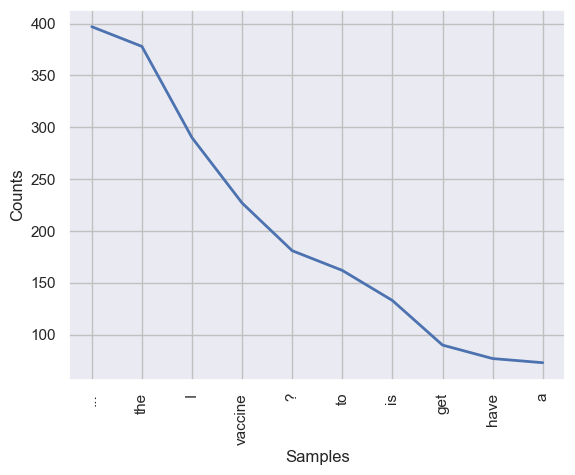

[('...', 397), ('the', 378), ('I', 290), ('vaccine', 227), ('?', 181), ('to', 162), ('is', 133), ('get', 90), ('have', 77), ('a', 73), ('of', 70), ('it', 68), ('if', 62), (',', 60), ('do', 59), ('that', 59), ('be', 58), ('my', 54), ('can', 52), ('not', 51)]


In [24]:
all_words=nltk.FreqDist(tokenized_words)
all_words.plot(10);
print(all_words.most_common(20))

Create a word cloud to show most common words in the article text.

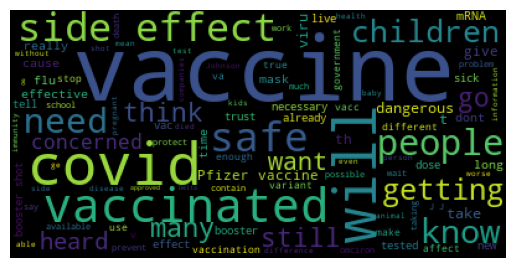

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(article_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data Cleaning
You will notice that the most frequent terms are stopwords and punctuations, let's try recalculating frequencies after performing some basic cleaning.

In [386]:
# Data Transformation: Converting article text to lowercase as Python is case-sensitive
df['sentence'] = df['sentence'].astype(str).str.lower()
df.head(3)

,sentence,label,label_idx,sentence_word_count
0,"if i apply the third dose, will i have stronge...",Are booster shot side effects worse than those...,175,16
1,what effects do these reinforcements have?,Are booster shot side effects worse than those...,175,6
2,i dont think the vaccine is neccessary the bas...,Are regular safety measures enough to stay hea...,20,14


In [387]:
# Data Tokenisation create word tokens
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['sentence'].apply(regexp.tokenize)
df.head(3)

,sentence,label,label_idx,sentence_word_count,text_token
0,"if i apply the third dose, will i have stronge...",Are booster shot side effects worse than those...,175,16,"[if, i, apply, the, third, dose, will, i, have..."
1,what effects do these reinforcements have?,Are booster shot side effects worse than those...,175,6,"[what, effects, do, these, reinforcements, have]"
2,i dont think the vaccine is neccessary the bas...,Are regular safety measures enough to stay hea...,20,14,"[i, dont, think, the, vaccine, is, neccessary,..."


In [388]:
# Stopwords: Set up stop words for removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Extend the list with your own custom stopwords
my_stopwords = ["'s", "a", "the", "n't"]
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /Users/anna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [391]:
#Create a new variable to store filtered tokens 
filtered_tokens=[]
for w in tokenized_words:    
    if w not in stopwords:
        # Replace similar spellings of vaccine with the correct spelling
        if w.lower() in ['vaccine', 'vaccinated', 'vaccines']:
            filtered_tokens.append('vaccine')
        else:
         #add all filtered tokens excluding stopwords in this list below
            filtered_tokens.append(w)

import string
# punctuations
punctuations=list(string.punctuation)
#Add custom punctuations to the list
punctuations.append("...")


#Create another variable to store all clean tokens
filtered_tokens_clean=[]
for i in filtered_tokens:
    if i not in punctuations:
        filtered_tokens_clean.append(i)

Now that we have cleaned the input text, let's calculate frequencies again to view the most common words.


##### **Key Insights:** 
As we can see in the output below, users are mostly thinking of getting the vaccine however are concerned about the side effects

In [392]:
#Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist

fdist = nltk.FreqDist(filtered_tokens_clean)
fdist

FreqDist({'vaccine': 314, 'get': 90, 'covid': 53, 'effects': 36, 'side': 36, 'safe': 33, 'people': 27, 'need': 24, 'know': 23, 'covid-19': 23, ...})

* Now we can use our fdist dictionary to drop words which occur less than a certain amount of times (usually we use a value of 3 or 4).
* Since our dataset is quite small, we don’t filter out any words and set the value to greater or equal to 1 (otherwise there are not many words left in this particular dataset)

In [394]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [395]:
df[['sentence', 'text_token', 'text_string_fdist']].head()

,sentence,text_token,text_string_fdist
0,"if i apply the third dose, will i have stronge...","[if, i, apply, the, third, dose, will, i, have...",apply third dose side effects second dose
1,what effects do these reinforcements have?,"[what, effects, do, these, reinforcements, have]",effects reinforcements
2,i dont think the vaccine is neccessary the bas...,"[i, dont, think, the, vaccine, is, neccessary,...",dont think vaccine neccessary safety good enough
3,"if i comply with the security measures, will i...","[if, i, comply, with, the, security, measures,...",comply security measures safe
4,"this is like the flu, being cautious is enough.","[this, is, like, the, flu, being, cautious, is...",like flu cautious enough


## Lemmatization


In [385]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/anna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [396]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

Note that in some datasets, there are no words to lemmatize. We can check this as follows:


In [397]:
# check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

In [398]:
# show level count
df.is_equal.value_counts()

True     661
False      3
Name: is_equal, dtype: int64

In [39]:
df

,sentence,label,label_idx,sentence_word_count,text_token,text_string_fdist,text_string_lem,is_equal
0,"if i apply the third dose, will i have stronge...",Are booster shot side effects worse than those...,175,16,"[if, i, apply, the, third, dose, will, i, have...",apply third dose side effects second dose,apply third dose side effects second dose,True
1,what effects do these reinforcements have?,Are booster shot side effects worse than those...,175,6,"[what, effects, do, these, reinforcements, have]",effects reinforcements,effects reinforcements,True
2,i dont think the vaccine is neccessary the bas...,Are regular safety measures enough to stay hea...,20,14,"[i, dont, think, the, vaccine, is, neccessary,...",dont think vaccine neccessary safety good enough,dont think vaccine neccessary safety good enough,True
3,"if i comply with the security measures, will i...",Are regular safety measures enough to stay hea...,20,11,"[if, i, comply, with, the, security, measures,...",comply security measures safe,comply security measures safe,True
4,"this is like the flu, being cautious is enough.",Are regular safety measures enough to stay hea...,20,9,"[this, is, like, the, flu, being, cautious, is...",like flu cautious enough,like flu cautious enough,True
...,...,...,...,...,...,...,...,...
659,what is covid-19,what is covid?,97,3,"[what, is, covid, 19]",covid 19,covid 19,True
660,what should i do against covid?,what is covid?,97,6,"[what, should, i, do, against, covid]",covid,covid,True
661,how deadly is the virus?,what is covid?,97,5,"[how, deadly, is, the, virus]",deadly virus,deadly virus,True
662,covid-19 is fake?,what is covid?,97,3,"[covid, 19, is, fake]",covid 19 fake,covid 19 fake,True


## Word Cloud


In [399]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

Word Cloud after cleaning

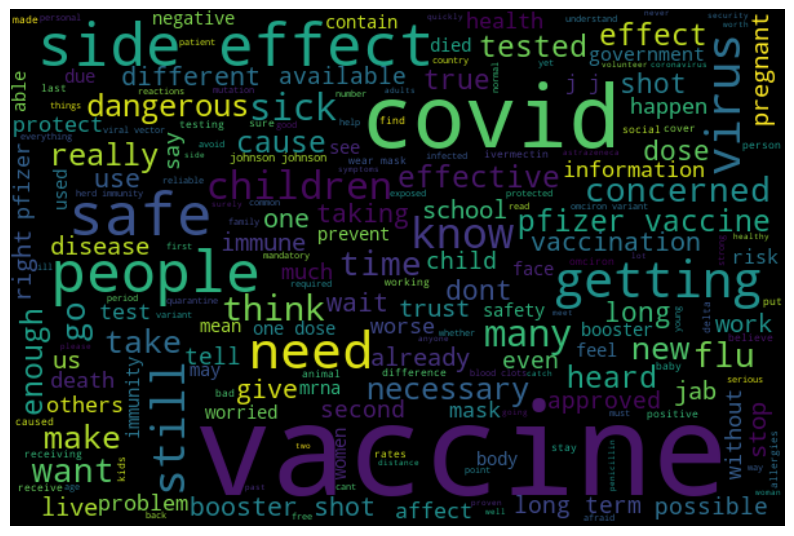

In [401]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

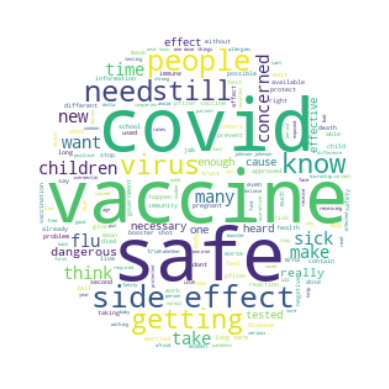

In [ ]:
#Different kind
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

## Frequency Distribution

In [403]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [404]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [405]:
#Most common words
fd.most_common(3)

[('vaccine', 363), ('get', 125), ('covid', 122)]

In [407]:
fd.tabulate(3)

vaccine     get   covid 
    363     125     122 


In [408]:
# Obtain top 10 words
top_10 = fd.most_common(10)

In [409]:
# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

In [412]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig.update_layout(
    xaxis_title="Frequency",
    yaxis_title="Word",
    title="Word Frequency"
)

# show plot
fig.show()

 #### **Key Insights:** 
Similar to the insights shown before, users are mostly thinking of getting the vaccine however are concerned about the side effects as shown in the top five bars.

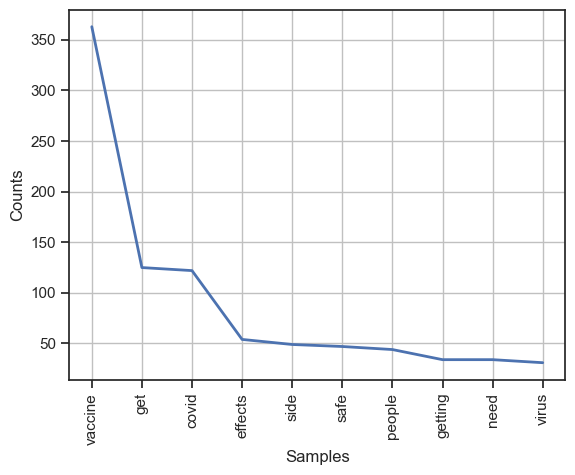

[('vaccine', 363), ('get', 125), ('covid', 122), ('effects', 54), ('side', 49), ('safe', 47), ('people', 44), ('getting', 34), ('need', 34), ('virus', 31), ('still', 27), ('know', 24), ('would', 23), ('children', 20), ('pfizer', 20), ('sick', 19), ('long', 19), ('many', 19), ('booster', 19), ('think', 17)]


In [106]:
fd1=nltk.FreqDist(words)
fd1.plot(10);
print(fd1.most_common(20))

In [108]:
#Search specific words
fd["covid"]

122

## Sentiment analysis
VADER lexicon
* NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

In [413]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [111]:
#Sentiment Intensity Analyzer
#Initialize an object of SentimentIntensityAnalyzer with name “analyzer”:

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [112]:
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,sentence,label,label_idx,sentence_word_count,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
661,how deadly is the virus?,what is covid?,97,5,"[how, deadly, is, the, virus]",deadly virus,deadly virus,deadly virus,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
662,covid-19 is fake?,what is covid?,97,3,"[covid, 19, is, fake]",covid fake,covid fake,covid fake,True,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp..."
663,what is covid?,what is covid?,97,3,"[what, is, covid]",covid,covid,covid,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [113]:
# Polarity Scores
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,sentence,label,label_idx,sentence_word_count,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
661,how deadly is the virus?,what is covid?,97,5,"[how, deadly, is, the, virus]",deadly virus,deadly virus,deadly virus,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
662,covid-19 is fake?,what is covid?,97,3,"[covid, 19, is, fake]",covid fake,covid fake,covid fake,True,"{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'comp..."
663,what is covid?,what is covid?,97,3,"[what, is, covid]",covid,covid,covid,True,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


Transform data

In [114]:
# Change data structure
df = pd.concat(
    [df.drop(['label_idx','label', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,sentence,sentence_word_count,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,"if i apply the third dose, will i have stronge...",16,"[if, i, apply, the, third, dose, will, i, have...",apply third dose stronger side effects second ...,apply third dose stronger side effects second ...,apply third dose stronger side effects second ...,True,0.0,0.729,0.271,0.3818
1,what effects do these reinforcements have?,6,"[what, effects, do, these, reinforcements, have]",effects reinforcements,effects reinforcements,effects reinforcements,True,0.0,1.000,0.000,0.0000
2,i dont think the vaccine is neccessary the bas...,14,"[i, dont, think, the, vaccine, is, neccessary,...",dont think vaccine neccessary basics safety me...,dont think vaccine neccessary basics safety me...,dont think vaccine neccessary basics safety me...,True,0.0,0.551,0.449,0.6908


In [115]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,sentence,sentence_word_count,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,"if i apply the third dose, will i have stronge...",16,"[if, i, apply, the, third, dose, will, i, have...",apply third dose stronger side effects second ...,apply third dose stronger side effects second ...,apply third dose stronger side effects second ...,True,0.0,0.729,0.271,0.3818,positive
1,what effects do these reinforcements have?,6,"[what, effects, do, these, reinforcements, have]",effects reinforcements,effects reinforcements,effects reinforcements,True,0.0,1.000,0.000,0.0000,neutral
2,i dont think the vaccine is neccessary the bas...,14,"[i, dont, think, the, vaccine, is, neccessary,...",dont think vaccine neccessary basics safety me...,dont think vaccine neccessary basics safety me...,dont think vaccine neccessary basics safety me...,True,0.0,0.551,0.449,0.6908,positive
3,"if i comply with the security measures, will i...",11,"[if, i, comply, with, the, security, measures,...",comply security measures safe,comply security measures safe,comply security measures safe,True,0.0,0.274,0.726,0.6486,positive


Analyse Data

In [116]:
# Sentences with highest positive sentiment

df.loc[df['compound'].idxmax()].values

array(['is the vaccine safe? or is it as strong as the disease?', 12,
       list(['is', 'the', 'vaccine', 'safe', 'or', 'is', 'it', 'as', 'strong', 'as', 'the', 'disease']),
       'vaccine safe strong disease', 'vaccine safe strong disease',
       'vaccine safe strong disease', True, 0.0, 0.244, 0.756, 0.7351,
       'positive'], dtype=object)

In [117]:
# Sentences with highest negative sentiment 
df.loc[df['compound'].idxmin()].values

array(['what are the chances that after receiving the covid vaccine i will get sick with the common flu? is there a risk of getting sick with the common flu?',
       29,
       list(['what', 'are', 'the', 'chances', 'that', 'after', 'receiving', 'the', 'covid', 'vaccine', 'i', 'will', 'get', 'sick', 'with', 'the', 'common', 'flu', 'is', 'there', 'a', 'risk', 'of', 'getting', 'sick', 'with', 'the', 'common', 'flu']),
       'chances receiving covid vaccine get sick common flu risk getting sick common flu',
       'chances receiving covid vaccine get sick common flu risk getting sick common flu',
       'chances receiving covid vaccine get sick common flu risk getting sick common flu',
       True, 0.612, 0.308, 0.079, -0.9022, 'negative'], dtype=object)

Visualise Data

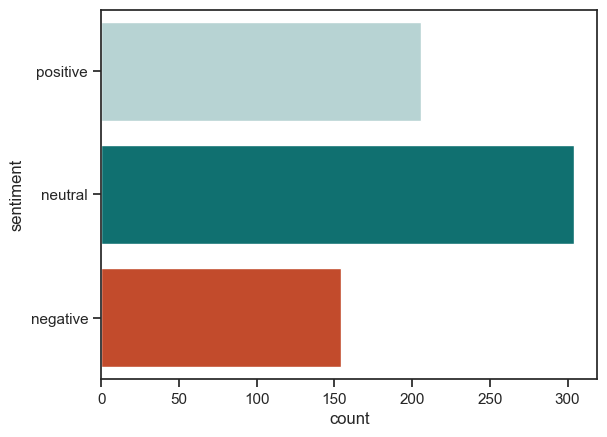

In [118]:
# Number of sentence/queries
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

 #### **Key Insights:** 
Based on sentiment, users are mostly neutral about the topic surrounding the corpus. However since the dataset is quite small, the bar chart could be evenly distributed in sentiment.

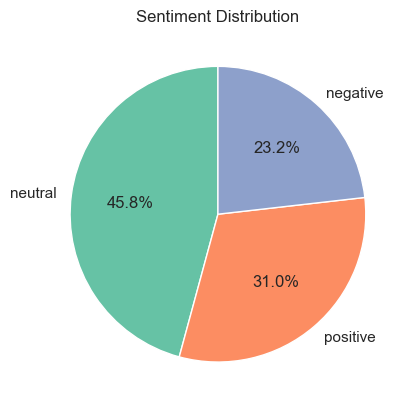

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your pandas dataframe containing the sentiment column
sentiment_counts = df['sentiment'].value_counts()

# Set up the pie chart
labels = sentiment_counts.index.tolist()
sizes = sentiment_counts.tolist()
colors = sns.color_palette('Set2', len(labels))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Sentiment Distribution')

# Show the plot
plt.show()

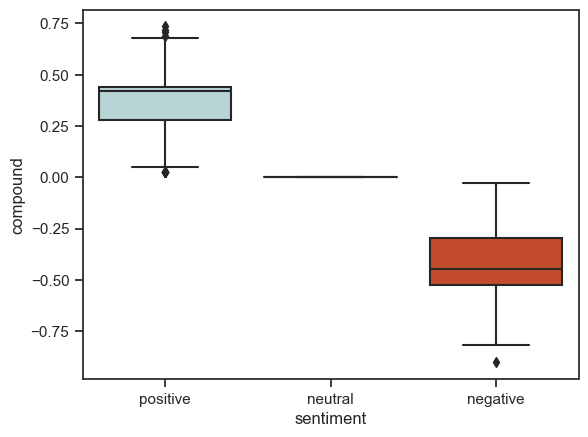

In [120]:
# Boxplot
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

 #### **Key Insights:** 
 There looks like there is more variability in the data as the boxplots for negative and positive sentiment showing people having stronger opinions/ emotions surrounding COVID and the vaccine. These factors can influence users decision making when they are thinking about receiving the vaccine.

## Collocations
It is also quite useful to find the most common words that co-occur. These two or three words that occur together are also known as BiGrams and TriGrams, but collocations are more meaningful than them. 


In [37]:
#Find most common words that co-occur
#Ranks bigram collocations found in the text using pointwise mutual information (PMI) measure.


from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens_clean)

#Using PMI scores to quantify and rank the BiGrams
finder.nbest(bigram_measures.pmi, 50)

[("'covid", '659'),
 ('0', 'apply'),
 ('111', 'keep'),
 ('114', 'rest'),
 ('116', 'scary'),
 ('117', 'qualifications'),
 ('118', 'cancer'),
 ('121', 'reasons'),
 ('124', '1-year-olds'),
 ('13', 'contraindications'),
 ('138', 'patient'),
 ('152', 'town'),
 ('154', 'foreigners'),
 ('155', 'scientific'),
 ('159', 'relationship'),
 ('160', 'likely'),
 ('164', 'impotence'),
 ('167', 'incidence'),
 ('172', 'eggs'),
 ('173', 'injecting'),
 ('175', 'injected'),
 ('177', 'ive'),
 ('185', 'recovering'),
 ('193', 'book'),
 ('197', 'eligible'),
 ('199', 'sounds'),
 ('201', 'prevalent'),
 ('203', 'convince'),
 ('204', 'parents'),
 ('207', 'check'),
 ('209', 'hello.is'),
 ('214', 'collects'),
 ('215', 'needs'),
 ('22', 'media'),
 ('224', 'mechanism'),
 ('23', 'facts'),
 ('232', 'optimal'),
 ('25', 'ovid-19'),
 ('257', 'asking'),
 ('260', 'protects'),
 ('263', 'uninsured'),
 ('268', 'process'),
 ('274', 'reservations'),
 ('295', 'conditions'),
 ('30', 'brain'),
 ('303', 'distrust'),
 ('309', 'advisab

## Word Associations
Let's see what the most associated words in our text are. You can repeat the same using trigrams.

In [38]:
from nltk import BigramAssocMeasures
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens_clean)

finder.nbest(bigram_measures.likelihood_ratio, 20)

[('side', 'effects'),
 ('get', 'vaccine'),
 ('vaccine', 'vaccine'),
 ('j', 'j'),
 ('one', 'dose'),
 ("'ve", 'heard'),
 ('blood', 'clots'),
 ('booster', 'shot'),
 ('become', 'magnetic'),
 ('wear', 'mask'),
 ('help', 'new'),
 ('long', 'term'),
 ('allergic', 'reactions'),
 ('convalescent', 'plasma'),
 ('erectile', 'dysfunction'),
 ('family', 'friends'),
 ('multiple', 'sclerosis'),
 ('supportive', 'possibl'),
 ('pfizer', 'vaccine'),
 ('booster', 'shots')]

We can also find words associated with specific words of interest. Let's do this using trigrams in NLTK 

In [39]:
#Produce trigram language model sciences associated with the trigram. 

trigram_measures = nltk.collocations.TrigramAssocMeasures()

# Ngrams with 'vaccine' as a member
vaccine_filter = lambda *w: 'vaccine' not in w

finder = TrigramCollocationFinder.from_words(filtered_tokens_clean)

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
# only trigrams that contain 'city'
finder.apply_ngram_filter(vaccine_filter)

# return the 10 n-grams with the highest PMI
# print (finder.nbest(trigram_measures.likelihood_ratio, 10))
for i in finder.score_ngrams(trigram_measures.likelihood_ratio):
    print (i)

(('vaccine', 'help', 'new'), 74.50677631930836)
(('j', 'j', 'vaccine'), 67.88044374862663)
(("'ve", 'heard', 'vaccine'), 61.07376508308419)


The output shows the three highest-scoring trigrams in the text data based on the likelihood ratio measure.


* (('vaccine', 'help', 'new'), 74.50677631930836) - This trigram has a high score, suggesting strong association "vaccine help new". This trigram could be associated with discussions of new vaccines that are helping to address a particular problem or issue.

* (('j', 'j', 'vaccine'), 67.88044374862663) - This trigram suggests an association between j.j and vaccine, which It is possible that this trigram occurs frequently in a specific context, such as a discussion about the Johnson & Johnson COVID-19 vaccine, which is often referred to as the "J&J vaccine".

* (("'ve", 'heard', 'vaccine'), 61.07376508308419) This trigram suggests an association, the sequence could be associated with discussions of rumors or hearsay about vaccines, such as rumors about vaccine side effects or efficacy..

## Concordances

We can further look up the locations at which a given word occurs in the dataset using a concordance analysis. In this case, we can investigate the context of j,j vaccine by looking at the occurance of this in the text.


In [41]:
from nltk.text import Text  
textlist = Text(filtered_tokens_clean)
print(textlist)
textlist.concordance('j')
textlist.concordance("j", width=100, lines=10)

<Text: 0 apply third dose stronge 1 effects reinforcements...>
Displaying 12 of 12 matches:
 says vaccine 57 believe catholics get j j vacci 58 restrictions catholics rela
ays vaccine 57 believe catholics get j j vacci 58 restrictions catholics relat 
 103 cause death volunteer wh 104 true j j vaccine killed woman 105 woman reall
03 cause death volunteer wh 104 true j j vaccine killed woman 105 woman really 
 delta variant dangerous kids 386 know j j vaccine effec 387 johnson johnson va
elta variant dangerous kids 386 know j j vaccine effec 387 johnson johnson vacc
na 544 would like know mrna 545 strong j j vaccine 546 j j vaccine made 547 wan
 544 would like know mrna 545 strong j j vaccine 546 j j vaccine made 547 want 
e know mrna 545 strong j j vaccine 546 j j vaccine made 547 want know modern va
know mrna 545 strong j j vaccine 546 j j vaccine made 547 want know modern vacc
ct chances gettin 653 wil booster shot j j modern 654 side effects covid-19 v 6
 chances gettin 653 wil boos

 #### **Key Insights:** 
We can confirm j j is relating to the vaccine Johnsons & Johnsons based from context surrounding the word.

## Topic Modelling
Topic modelling is a type of NLP task that utilises unsupervised learning methods to extract out the main topics of some text data we deal with. The word “Unsupervised” here means that there are no training data that have associated topic labels. Instead, the algorithms try to discover the underlying patterns, in this case, the topics, directly from the data itself. There are many kinds of algorithms used for topic modelling. Here we will look at:
* Latent Dirichlet Allocation (LDA)


Latent Dirichlet Allocation (LDA): The basic assumption for LDA is that each of the document can be represented by the distribution of topics which in turn can be represented by some word distribution. Hence, the LDA model will breakdown the percentage contribution of each topic towards that document. For example, if we set the number of topics to be 5, then document A can be denoted like the following:

* document_A = 0.2 x Topic1 + 0.1 x Topic2 + 0.1 x Topic3 + 0.5 x Topic4 + 0.1 x Topic5 

In [209]:
# CLean text

import nltk
from nltk.stem import *
#nltk.download(‘punkt’) # For Stemming
##nltk.download(‘wordnet’) # For Lemmatization
#nltk.download(‘stopwords’) # For Stopword Removal
#nltk.download(‘omw-1.4’)

In [210]:
# Stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

In [211]:
# Load data
import pandas as pd
import numpy as np

# Store in a pandas dataframe
df = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/AT1B Datasets/IBM_Debater_(R)_Intent_expressions/dev_23.csv')

In [212]:
#Preprocessing

## Stopwords: Set up stop words for removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Extend the list with your own custom stopwords
my_stopwords = ["'s", "a", "the", "n't"]
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


In [213]:
def text_preprocessing(df):
    corpus=[]
    
    lem = WordNetLemmatizer() # For Lemmatization
    for news in df['sentence']:
        words=[w for w in nltk.tokenize.word_tokenize(news) if (w not in stopwords)] # word_tokenize function tokenizes text on each word by default
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus
# Apply this function on our data frame
corpus = text_preprocessing(df)

Here we loop over each sentence/queries applying tokenisation and lemmization in sequential order. 
Next we use genism package for LDA.

In [214]:
#!pip install -U gensim==3.8.3
import gensim

The variable called “bow_corpus” in which we store the Bag-of-Words (bow) transformed documents

In [215]:
# Transform to gensim dictionary
dic = gensim.corpora.Dictionary(corpus) 
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
import pickle # Useful for storing big datasets
pickle.dump(bow_corpus, open('corpus.pkl', 'wb'))
dic.save('dictionary.gensim')

The Actual Model

Here we use LdaMulticore function over the basic LDAmodel function because the former supports multiprocessing which can save running time. 
* We can specify the number of processors thar can participle in the multi-processing operation with the 'workers augment'.
* We can also specify the number of topics to be extracted from the corpus through the “num_topics” argument. 
* Unfortunately, there is no way of finding out what number of topics would be the optimal value unless you have some domain knowledge about the corpus beforehand.

In [ ]:
#Train LDA model
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                    id2word = dic,
                                      passes = 10,
                                      workers = 2)
lda_model.save('model4.gensim')

In [217]:
# We print words occuring in each of the topics as we iterate through them

for idx, topic in lda_model.print_topics(num_words=10):    
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.068*"vaccine" + 0.030*"effect" + 0.027*"safe" + 0.023*"side" + 0.018*"shot" + 0.018*"booster" + 0.015*"know" + 0.012*"get" + 0.012*"How" + 0.010*"What"
Topic: 1 
Words: 0.069*"vaccine" + 0.048*"vaccinated" + 0.029*"covid" + 0.028*"get" + 0.019*"people" + 0.018*"Will" + 0.013*"many" + 0.013*"getting" + 0.012*"Can" + 0.010*"necessary"
Topic: 2 
Words: 0.111*"vaccine" + 0.040*"get" + 0.022*"virus" + 0.015*"need" + 0.013*"effect" + 0.013*"COVID" + 0.012*"side" + 0.011*"sick" + 0.011*"vaccinated" + 0.010*"concerned"
Topic: 3 
Words: 0.095*"vaccine" + 0.034*"What" + 0.022*"get" + 0.013*"people" + 0.012*"one" + 0.011*"child" + 0.010*"getting" + 0.010*"dose" + 0.010*"Johnson" + 0.008*"really"


 #### **Key Insights:** 
In Topic 0, the word "vaccine" has the highest weight of 0.068, followed by "effect" with a weight of 0.030. This suggests that Topic 0 is related to the effectiveness of vaccines.

Similarly, in Topic 1, the word "vaccine" has the highest weight of 0.069, followed by "vaccinated" with a weight of 0.048. This suggests that Topic 1 is related to people getting vaccinated for COVID-19.

**Evaluation**

There is no definite way of finding out the optimal number of topics. A more rigourous way however is to use coherence score. We will use this as a baseline and then eyeball through the documents in each topuc and their key words to have our own sense.

Coherance score measures the degree of semantic similarity between high scoring words in each topic. There exist several algorithms including C_v, C_p, C_uci, C_umass and so on. C_v and C_umass are two of the more widely used approaches. 


Here we will use the C_v method:

In [219]:
from gensim.models import CoherenceModel
# instantiate topic coherence model
cm = CoherenceModel(model=lda_model, corpus=bow_corpus, texts=corpus, coherence='c_v')
# get topic coherence score
coherence_lda = cm.get_coherence()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [220]:
print(coherence_lda) #is not bad but not decent

0.4104575961899962


There has been much discussion on what is considered good. The following from Stackoverflow suggests the following rubric:
* 0.3 is bad
* 0.4 is low
* 0.55 is okay
* 0.65 might be as good as it is going to get
* 0.7 is nice
* 0.8 is unlikely and
* 0.9 is probably wrong

0.4104575961899962 is relatively low. So we will explore if the coherence varies depending on the number of topics in the corpus.


We iterate from numbers 2 to 6 for the number of topics and store each coherence score in the variable called score which is initialized as an empty list. We then visualize this into a line graph using Python’s matplotlib package.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

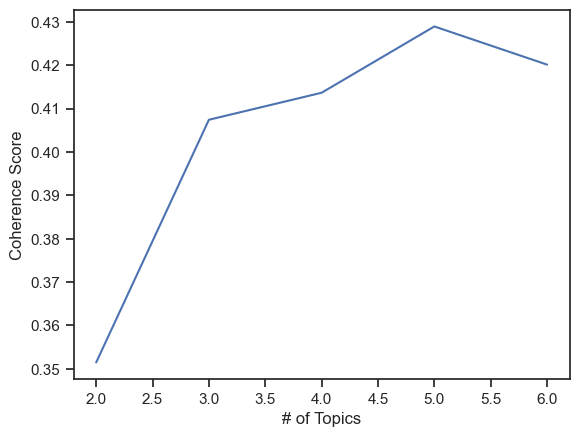

In [221]:
import matplotlib.pyplot as plt
topics = []
score = []
for i in range(2,7,1):
     lda = gensim.models.LdaMulticore(corpus=bow_corpus, id2word=dic, iterations=10, num_topics=i, workers = 3, passes=10, random_state=42)
     cm = CoherenceModel(model=lda, corpus=bow_corpus, texts=corpus, coherence='c_v')
     topics.append(i) # Append number of topics modeled
     score.append(cm.get_coherence()) # Append coherence scores to list
plt.plot(topics, score)
plt.xlabel('# of Topics')
plt.ylabel('Coherence Score')
plt.show()

Coherence score is the highest when there are five topics to be extracted. The score increases as the number of topics increases but decreases from five oonwards.

In [222]:
# LDA model with five topics

lda_model2 = gensim.models.LdaMulticore(bow_corpus,
                                    num_topics = 5,
                                     id2word = dic,
                                        passes = 8,
                                       workers = 3)
lda_model2.save('model2.gensim')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [223]:
# We print words occuring in each of the topics as we iterate through them
for idx, topic in lda_model2.print_topics(num_words=20):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.077*"vaccine" + 0.029*"effect" + 0.025*"covid" + 0.025*"vaccinated" + 0.023*"side" + 0.021*"know" + 0.018*"get" + 0.014*"Will" + 0.014*"shot" + 0.013*"getting" + 0.011*"Does" + 0.011*"long" + 0.010*"safe" + 0.009*"people" + 0.009*"How" + 0.009*"cause" + 0.009*"necessary" + 0.008*"time" + 0.008*"virus" + 0.008*"booster"
Topic: 1 
Words: 0.087*"vaccine" + 0.021*"get" + 0.019*"child" + 0.016*"tested" + 0.014*"safe" + 0.014*"Can" + 0.012*"What" + 0.011*"different" + 0.010*"say" + 0.010*"enough" + 0.008*"school" + 0.007*"would" + 0.007*"use" + 0.007*"dose" + 0.007*"COVID" + 0.007*"flu" + 0.007*"booster" + 0.006*"pregnant" + 0.006*"woman" + 0.006*"covid-19"
Topic: 2 
Words: 0.092*"vaccine" + 0.034*"get" + 0.019*"vaccinated" + 0.016*"people" + 0.015*"covid" + 0.014*"Johnson" + 0.014*"dangerous" + 0.013*"getting" + 0.012*"'ve" + 0.011*"Will" + 0.011*"need" + 0.010*"variant" + 0.009*"COVID-19" + 0.008*"test" + 0.008*"heard" + 0.008*"still" + 0.007*"think" + 0.007*"The" + 0.00

 #### **Key Insights:** 
There does not seem to be significant difference compared to the results earlier. 

Topic 0, we can see that the top words are "vaccine", "effect", "covid", "vaccinated", and "side", indicating that this topic may be related to questions about the effectiveness and side effects of COVID-19 vaccines. The words "get", "Will", and "shot" also suggest that people may be asking about getting vaccinated and what to expect from the vaccine.

Similarly, Topic 1 appears to be related to questions about the safety and efficacy of vaccines for children, as well as questions about different types of vaccines (e.g., flu vaccine) and dosages.

Topic 2 may be related to questions about the risk of getting infected with COVID-19 even after getting vaccinated, as well as questions about different vaccine brands (e.g., Johnson & Johnson) and their safety.

Topic 3 may be related to questions about the side effects of vaccines and their impact on people with different medical conditions, as well as questions about the long-term effects of the vaccine.

Finally, Topic 4 appears to be related to questions about the safety and efficacy of the vaccine, as well as questions about when and how to get vaccinated, and concerns about the safety of mRNA technology used in some vaccines.

Nevertheless, even with eye balling, we can get a slightly better sense of what each of the topics is about which usually suggests better coherence.

Visualizing LDA Results

In [226]:
#!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models

In [225]:
# Loading the dictionary and corpus files we saved earlier
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
# Loading the num_of_topics = 2 model we saved earlier
lda = gensim.models.ldamodel.LdaModel.load('model2.gensim')
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, bow_corpus, dic, sort_topics=False)
pyLDAvis.display(vis)

 #### **Key Insights:** 
* On the left side of the the pyLDAvis dashboard, the area of each circle represents the importance of the topic relative to the corpus. In addition, the distance between the center of the circles indicates the similarity between the topics.
* On the right side of the dashboard, the top 30 relevant words of each topic are displayed in a histogram with the red portion of the bar representing the estimated term frequency within the selected topic (saliency) and the light blue portion representing the overall term frequency.

## Article Key Extraction with BERT

 Keyword extraction is the automated process of extracting the words and phrases that are most relevant to an input text. Here we will use BERT which is a bi-directional transformer model that allows us to transform phrases and documents to vectors that capture their meaning.

In this scenario, we will be using BERT to create our own keyword extraction model


In [9]:
# Load the dataset
df = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/AT1B Datasets/IBM_Debater_(R)_Intent_expressions/dev_23.csv')
article_text = df['sentence'].to_string()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Extend the list with your own custom stopwords
my_stopwords = ["'s", "a", "the", "n't"]
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# Extract candidate words/phrases
count = CountVectorizer(ngram_range=(1, 1), stop_words=stopwords).fit([article_text])
candidates = count.get_feature_names_out()

We can use n_gram_range to change the size of the resulting candidates. For example, if we would set it to (3, 3) then the resulting candidates would phrases that include 3 keywords.
We will be exploring other n gram ranges and try not removing stopwords as it may tie longer keyphrases together

Embeddings

We use BERT because it has shown great results for both similarity- and paraphrasing tasks. There are many embedding methods suc as Flair, HuggingFace Transformers. Here we will use sentence-transformers package as it quickly create high-quality embeddings that work quite well for sentence- and document-level embeddings. 

In [2]:
#Convert keywords into numerical data. 

#!pip install sentencepiece
#!pip install sentence-transformers


In [12]:
queries = df["sentence"]

In [13]:
from sentence_transformers import SentenceTransformer

In [14]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([queries])
candidate_embeddings = model.encode(candidates)

Distilbert as it has shown great performance in similarity tasks, which is what we are aiming for with keyword/keyphrase extraction. There are other pre-trained BERT models for keyword extraction but distilbert — base-nli-stsb-mean-tokens or xlm-r-distilroberta-base-paraphase-v1 has been most commonly used and tested to have great performance in semantic similarity and paraphrase identification.

A limitation of transformer models is that they have token limit, so we might encounter some errors when inputting large documents. When dealing with larger corpus, we could consider splitting up your document into paragraphs and mean pooling (taking the average of) the resulting vectors.

Cosine Similarity

We want to find candidates that are most similar to the document. We assume that the most similar candidates to the document are good keywords for representing the document.

To calculate the similarity between candidates and the document, we will be using the cosine similarity between vectors as it performs quite well in high-dimensionality

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

top_n = 5
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

In [16]:
#top 5 most similar candidates to the input document as the resulting keywords:
keywords

['recovering', '3rd', 'might', 'may', 'third']

The results does seem to represent uncertainity about the vaccine. Lets investigate using n(3,3)

In [17]:
count = CountVectorizer(ngram_range=(3, 3), stop_words=stopwords).fit([article_text])
candidates = count.get_feature_names_out()

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([queries])
candidate_embeddings = model.encode(candidates)


top_n = 5
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

keywords

['vaccine might react',
 'third dose stronge',
 'could vaccine prevent',
 'vaccine might work',
 'apply third dose']

We have keyphrases which seems to give a better representation of the document. Since these phrases look similar, we are going to take a look at the diversification of our results.

Diversification

The results above are similar becuase they represent the whole document. If we were to diversify the keywords/keyphrases then they are less likely to represent the document well as a collective.

Diversification requires a balance between the accuracy of keywords/keyphrases and the diversity between them.

There are two algorithms that we will be using to diversify our results:

* Max Sum Similarity
* Maximal Marginal Relevance

Max Sum Similarity

Max sum similarity distance between pairs of data is defined as the pairs of data for which the distance between them is maximized. In our case, we want to maximize the candidate similarity to the document whilst minimizing the similarity between candidates.


To do this, we select the top 20 keywords/keyphrases, and from those 20, select the 5 that are the least similar to each other:

In [18]:
#Max Sum Similarity
#Select top 20 keywords/keyphrases, then select the 5 that are the least similar to each other:


import numpy as np
import itertools

def max_sum_sim(doc_embedding, word_embeddings, words, top_n, nr_candidates):
    # Calculate distances and extract keywords
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    distances_candidates = cosine_similarity(candidate_embeddings, 
                                            candidate_embeddings)

    # Get top_n words as candidates based on cosine similarity
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # Calculate the combination of words that are the least similar to each other
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

In [19]:
#low nr_candidates
max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=5, nr_candidates=10)

['receiving vaccine may',
 'possible booster shot',
 'cure worse disease',
 'people higher risk',
 'apply third dose']

In [20]:
#high nr candidates
max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=5, nr_candidates=20)

['might react badly',
 'benefits getting vaccine',
 'cure worse disease',
 'third dose stronge',
 'apply third dose']

Low nr_candidates looks similar to the original cosine method and high nr_candidates have more diverese key phrases. However as nr_candidates increases, we may have diverese keywords however they are not good representations of the document. 
It is recommended to keep nr_candidates <20% of the document

Maximal Marginal Relevance

The other method for diversifying our results is Maximal Marginal Relevance (MMR). MMR tries to minimize redundancy and maximize the diversity of results in text summarization tasks.
It is fortunate that EmbedRank, which is a keyword extraction algorithm, has incorporated a modified version of MMR that enables us to apply it for the purpose of broadening our range of keywords or keyphrases.

We begin the process by choosing the keyword or keyphrase that bears the highest resemblance to the document, Then, we iteratively select new candidates that are both similar to the document and not similar to the already selected keywords/keyphrases:

In [21]:
#Maximal Marginal Relevance

import numpy as np

def mmr(doc_embedding, word_embeddings, words, top_n, diversity):

    # Extract similarity within words, and between words and the document
    word_doc_similarity = cosine_similarity(word_embeddings, doc_embedding)
    word_similarity = cosine_similarity(word_embeddings)

    # Initialize candidates and already choose best keyword/keyphras
    keywords_idx = [np.argmax(word_doc_similarity)]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]

    for _ in range(top_n - 1):
        # Extract similarities within candidates and
        # between candidates and selected keywords/phrases
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # Calculate MMR
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # Update keywords & candidates
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    return [words[idx] for idx in keywords_idx]

In [22]:
#low diversity
mmr(doc_embedding,candidate_embeddings, candidates, top_n=5, diversity=0.2)

['apply third dose',
 'vaccine might work',
 'people higher risk',
 'cure worse disease',
 'possible booster shot']

In [23]:
#high diversity
mmr(doc_embedding,candidate_embeddings, candidates, top_n=5, diversity=0.7)

['apply third dose',
 'efficient vaccine reasonable',
 'school without vacci',
 'dangerous kids 386',
 'vaccinated 125 people']

Low diversity looks similar to the original cosine method and and high diversity have more diverse key phrases

## Advanced Topic Modelling with BERTopic 

In [314]:
data = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/AT1B Datasets/IBM_Debater_(R)_Intent_expressions/dev_23.csv')
queries = data["sentence"]

We perform topic modeling using the BERTopic library. The a simple approach.

In [315]:
#!pip install bertopic
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [316]:
#stopwords
import nltk
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)

# Extend the list with your own custom stopwords
my_stopwords = ["'s", "a", "the", "n't"]
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [317]:
# we add this to remove stopwords

queries = data["sentence"]

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(queries) #create topics

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

2023-03-29 21:14:59,291 - BERTopic - Transformed documents to Embeddings
2023-03-29 21:15:01,588 - BERTopic - Reduced dimensionality
2023-03-29 21:15:01,639 - BERTopic - Clustered reduced embeddings


In [318]:
#top -1 topic is typically assumed to be irrelevant, and it usually contains stop words like “the”, “a”, and “and”. However, we removed stop words via the vectorizer_model argument, and so it shows us the “most generic” of topics like “Python”, “code”, and “data”.

freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,146,-1_vaccine_johnson_vaccines_people
1,0,122,0_covid_covid19_get_covid vaccine
2,1,50,1_trust_vaccine_tested_dont
3,2,48,2_effects_side_side effects_vaccine
4,3,31,3_mrna_vaccine vaccine_viral vector_viral
5,4,31,4_get_necessary_vaccine necessary_get vaccinated
6,5,27,5_available_get_vaccine get_get vaccine
7,6,24,6_children_vaccinated_school_without
8,7,20,7_safe_vaccine safe_safe vaccine_vaccine
9,8,20,8_still get_wait_protected_still


In [319]:
model.get_topic_info(0) #select most frequent topic

,Topic,Count,Name
0,0,122,0_covid_covid19_get_covid vaccine


In [320]:
queries = df['sentence']
print(len(queries))

664


In [321]:
print(queries[1])

What effects do these reinforcements have?


In [322]:
print(queries[663])

WHAT IS COVID?


In [323]:
model.visualize_topics()

 #### **Key Insights:** 
The area of these topic circles is proportional to the amount of words that belong to each topic across the dictionary.

The largest topics is represented with larger circles. COVID, trust and side effects are consistent main topics across the text. 

User intent could be they are unfamiliar with this new virus COVID as well as trust about getting the vaccine from different pharmaceutical companies as well concern about the side effects of the vaccine.

In [324]:
#we can also extract information on a document level, such as their corresponding topics, probabilities, whether they are representative documents for a topic, etc.:
model.get_document_info(queries)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,"If I apply the third dose, will I have stronge...",12,12_dose_one dose_doses_one,dose - one dose - doses - one - many - vaccine...,0.315815,False
1,What effects do these reinforcements have?,2,2_effects_side_side effects_vaccine,effects - side - side effects - vaccine - vacc...,0.189400,False
2,i dont think the vaccine is neccessary the bas...,1,1_trust_vaccine_tested_dont,trust - vaccine - tested - dont - think - gove...,0.157616,False
3,"If I comply with the security measures, will I...",4,4_get_necessary_vaccine necessary_get vaccinated,get - necessary - vaccine necessary - get vacc...,0.101692,False
4,"This is like the flu, being cautious is enough.",0,0_covid_covid19_get_covid vaccine,covid - covid19 - get - covid vaccine - flu - ...,0.097119,False
...,...,...,...,...,...,...
659,what is covid-19,0,0_covid_covid19_get_covid vaccine,covid - covid19 - get - covid vaccine - flu - ...,1.000000,False
660,what should i do against covid?,0,0_covid_covid19_get_covid vaccine,covid - covid19 - get - covid vaccine - flu - ...,0.563894,True
661,how deadly is the virus?,0,0_covid_covid19_get_covid vaccine,covid - covid19 - get - covid vaccine - flu - ...,0.343584,False
662,covid-19 is fake?,0,0_covid_covid19_get_covid vaccine,covid - covid19 - get - covid vaccine - flu - ...,1.000000,False


In [325]:
#Visualize Topic Probabilities

model.visualize_distribution(probs[0])

##### **Key Insight:**
 In the current model all show least a small percentage of each topic. However, topic 12 tends to dominate each corpus.

In [277]:
model.visualize_barchart()

In [274]:
# Hierarchical topics
from scipy.cluster import hierarchy as sch

linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = model.hierarchical_topics(queries, linkage_function=linkage_function)

100%|██████████| 18/18 [00:00<00:00, 217.29it/s]


In [275]:
model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


In this hierarchial clustering, if you hover over the black circles, we can see the topic representation at that level of the hierarchy.
These representations help you understand the effect of merging certain topics.
Now we can see sub-topics can be found within certain larger themes.

In [276]:
#text based hierarchy so we can see better which topics could be logically merged
tree = model.get_topic_tree(hierarchical_topics)
print(tree)

.
├─■──booster_shot_booster shot_original vaccine_booster original ── Topic: 14
└─vaccine_get_covid_effects_vaccinated
     ├─vaccine_get_covid_vaccinated_effects
     │    ├─■──pfizer_pfizer vaccine_adults_heart_age ── Topic: 9
     │    └─vaccine_get_covid_vaccinated_effects
     │         ├─vaccine_get_covid_effects_side
     │         │    ├─vaccine_covid_get_effects_side
     │         │    │    ├─vaccine_covid_get_effects_side
     │         │    │    │    ├─new_omciron_virus_variant_omciron variant
     │         │    │    │    │    ├─■──virus_mutations_new_strains_vaccine covers ── Topic: 17
     │         │    │    │    │    └─■──omciron_variant_new_omciron variant_omicron ── Topic: 13
     │         │    │    │    └─vaccine_covid_get_effects_side
     │         │    │    │         ├─vaccine_covid_get_effects_side
     │         │    │    │         │    ├─■──tested_vaccine_trust_approved_dont ── Topic: 2
     │         │    │    │         │    └─vaccine_covid_get_effects_side


In [278]:
#Visualize Topic Similarity 
model.visualize_heatmap()

In the matrix above, we can see similarity scores of vaccines as we hover over the graph.

Transformer embedding

In [37]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [38]:
n = len(queries)
n

664

In [39]:
print(queries.index.start)
print(queries.index.stop)

0
664


We have encoded the text in batches of 664, and each of these batches has been appended to the 'embeds' array. Once all the sentence embeddings have been added to 'embeds', we can proceed to the next step.

In [40]:
import numpy as np
from tqdm.auto import tqdm

batch_size = 664

embeds = np.zeros((n, model.get_sentence_embedding_dimension()))

for i in tqdm(range(0, n, batch_size)):
    i_end = min(i+batch_size, n)
    batch = queries[i:i_end]
    batch_embed = model.encode(batch)
    embeds[i:i_end,:] = batch_embed

  0%|          | 0/1 [00:00<?, ?it/s]

Dimensionality Reduction

One we built our embeddings, BERTopic reduces their dimensionality by compressing them into a lower-dimensional space. As a result, the 384-dimensional vectors are converted into two or three-dimensional vectors.

We can do this by using HDBSCAN clustering step can be done more efficiently compared to  clustering step with 384-dimensions would be very slow.

There are many dimensionality reduction techniques to this data; two of the most popular choices are PCA and t-SNE. However we we can capture the best of both using a lesser-known technique called Uniform Manifold Approximation and Production (UMAP).


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [327]:
data = pd.read_csv('/Users/anna/Desktop/ANLP/Assignments/AT1B Datasets/IBM_Debater_(R)_Intent_expressions/dev_23.csv')
queries = data["label"]

In [328]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the corpus
corpus_vectors = vectorizer.fit_transform(queries)


In [76]:
#conda install numba numba-omp

In [329]:
import numba as nb

In [330]:
# Use UMAP to embed the corpus vectors into a lower-dimensional space
import umap


In [331]:
umap_model = umap.UMAP(n_components=2)
umap_embeddings = umap_model.fit_transform(corpus_vectors)

In [332]:
#apply umap on label column

fit = umap.UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
u = fit.fit_transform(embeds)

In [334]:
umap_df = pd.DataFrame(u, columns=['x', 'y', 'z'])
umap_df['word'] = queries

In [415]:
#visualise reduced data to lower dimensional space
fig = px.scatter_3d(umap_df, x='x', y='y', z='z', hover_name='word', width=1000, height=1000)
fig.show()

Here we will use HDBSCAN to cluster low dimensional vectors.

In [86]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(u)

HDBSCAN()

<Axes: ylabel='$\\lambda$ value'>

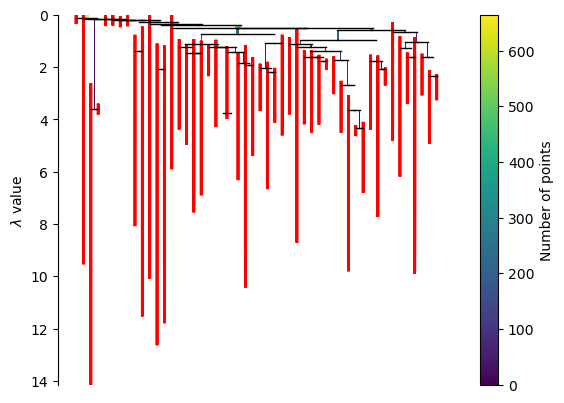

In [87]:
clusterer.condensed_tree_.plot(select_clusters=True)

The condensed tree plot shows drop offs of points into outliers and the splittings of clusters
HDBDSCAN chooses the final cluster based on size and persistence over varying lambda values.
The trees thicket 'branches' are viewed as the best candidates for clusters.

Here we can see this is not very useful because the default minimum number of points to create a cluster is 5. So we increase this threshold using the min_cluster_size parameter. 
We also added min_sample=40 to allow core points

<Axes: ylabel='$\\lambda$ value'>

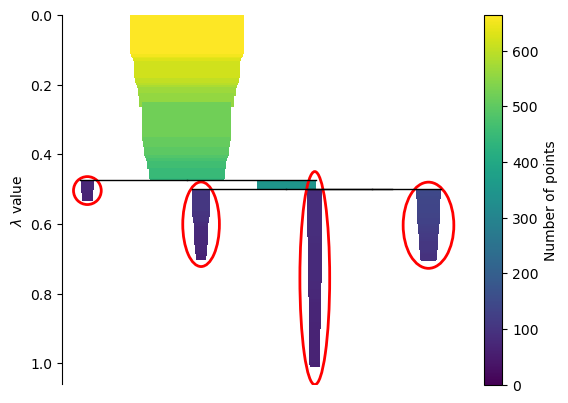

In [160]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=60, min_samples=30)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

In [140]:
model = BERTopic()
topics, probs = model.fit_transform(queries)

In [349]:
import plotly.express as px
import hdbscan
import numpy as np



In [348]:
# Create a HDBSCAN clusterer
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=30)
clusterer.fit(u)

# Get the cluster labels
labels = clusterer.labels_

# Create a scatter plot with different colors for each cluster
fig = px.scatter(x=u[:, 0], y=u[:, 1], color=labels.astype(str),
                 color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

We first fit a HDBSCAN clusterer to the data u. We then extract the cluster labels from the clusterer.labels_ attribute.
Each colour represents the topic cluster from HDBSCAN as a 2D model.

## Conclusion
 From of doing this research based on the output on the VIRA ChatBot, it had demonstrated that the majority of users are enquiring about the same topic COVID and the vaccine. Users are mostly unsure about receiving the vaccine, however some have strong opinions regarding the topic. 

Ensuring adequate COVID-19 vaccination continues to be a challenging topic as individuals attitudes and perceptions have strong influence on uptake. This research confirms these findings through the analysis of user intent based on the dataset provided. There are other explanatory measures that could be included in the dataset to give us a better understanding of user intent surround the COVID 19 vaccine such as demographics (eg. income, employment) and medical history. 